# __2. 데이터와 표본분포__

##### 파이썬 패키지, 데이터 import

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
state = pd.read_csv('./data/state.csv')
dfw = pd.read_csv('./data/dfw_airline.csv')
sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
lc_loans = pd.read_csv('./data/lc_loans.csv')
airline_stats = pd.read_csv('./data/airline_stats.csv')
loans_income = pd.read_csv('./data/loans_income.csv').squeeze('columns')

## __2.1 임의표본추출과 표본편향__

#### __표본__ : 더 큰 데이터 집합(모집단)으로부터 얻은 부분집합
#### __모집단__ : 어떤 데이터 집합을 구성하는 전체 대항 혹은 전체 집합 (이론적인 가상의 집합을 의미하기도 함)
#### __N__ : 모집단(표본)의 크기

#### __임의표본추출(임의표집, 랜덤표본추출)__ : 모집단 내 선택 가능한 원소들을 무작위로 표본 추출
#### __단순임의표본__ : 임의표본추출로 얻은 표본
#### 복원추출 : 중복 추출이 가능하도록 해당 샘플을 다시 모집단에 포함시킴
#### 비복원추출 : 한 번 뽑힌 원소는 추후 추첨에 사용하지 않음

#### __층화표본추출(층화표집)__ : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
#### __계층__ : 공통된 특징을 가진 모집단의 동종 하위 그룹

#### __대표성__ : 완결성, 형식의 일관성, 깨끗함 및 각 데이터 값의 정확성

#### __편향(bias)__ : 측정 과정 혹은 표본추출과정에서 발생하는 계통적인(systematic) 오차
#### __표본편항__ : 모집단을 잘못 대표하는 표본
#### 대표되도록 의도된 모집단으로부터 추출되지 않고 비임의(nonrandom) 방식으로 표본이 추출

## __2.2 선택편향__

#### __선택편향__ : 관측 데이터를 선택하는 방식 때문에 생기는 편향
#### 데이터 스누핑 : 뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것
#### 방대한 검색 효과 : 중복 데이터 모델링이나 너무 많은 예측변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

#### __평균으로의 회귀__ : 주어딘 어떤 변수를 연속적으로 측정했을 때 나타나는 현상

## __2.3 통계학에서의 표본분포__

#### __표본통계량__ :  모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
#### 일반적으로 표본통계량으로 어떤것을 측정하거나 무언가를 모델링 하기 위해 표본을 추출함


#### __데이터 분포__ : 어떤 데이터 집합에서 각 개별 __값__의 도수분포
#### __표본 분포(sampling distribution)__ : 여러 표본들 혹은 재표본들로부터 얻은 표본통계량의 도수분포표
#### 데이터 분포라고 알려진 개별 데이터 포인트의 분포와 표본분포라고 알려진 표본통계량의 분포를 구별하는 것이 중요
#### 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종모양일 가능성이 높다.
#### 표본이 클 수록 표본통계량의 분포가 좁아진다.

In [12]:
# 렌딩 클럽에 대출을 신청한 사람들을 평가하기 위한 연간 소득 정보를 사용하는 예
# 1000개의 앖으로 이뤄진 표본, 5개 값의 평균 1000개로 이뤄진 표본, 20개 값의 평균 1000개로 이뤄진 표본

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type':'Data',
})

sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
7713,75000.0,Data
49463,60000.0,Data
20218,37233.0,Data
46380,64000.0,Data
32555,44000.0,Data


findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


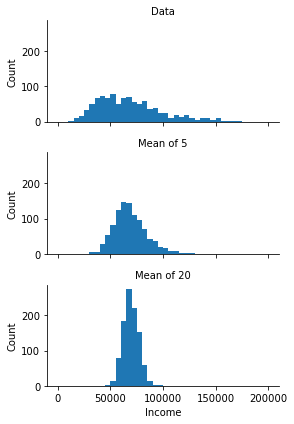

In [11]:
# 히스토그램

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

### __2.3.1 중심극한정리__

#### __중심극한정리__ : 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 종 모양의 정규곡선을 따른다.
#### 이를 이용해 표본분포에 대한 신뢰구간이나 가설검정을 계상하는데 t분포와 같은 정규근사 공식을 사용함

### __2.3.2 표준오차__

#### __표준오차__ : 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표
#### 표본 값들의 __표준편차 $s$와 표본크기 $n$__을 기반으로 한 통계량을 이용하여 추정
### $SE = \frac{s}{\sqrt{n}}$

#### __n제곱근의 법칙 : 표본크기가 커지면 표준오차가 줄어든다(표본크기는 표준오차에 반비례한다)__

#### __표준오차 측정 시 고려사항__
#### 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
#### 각각의 새 샘플에 대해 통계량(예 : 평균)을 계산한다.
#### 2단계에서 얻은 통계량의 표준편차를 계산한다. 이것을 표준오차의 추정치로 사용한다.

#### __표준편차와 표준오차__
#### 개별 데이터 포인트의 변동성을 측정 -> __표준편차__
#### 표본 측정 지표의 변동성을 측정 -> __표준오차__

## __2.4 부트스트랩__

#### __부트스트랩__ : 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것

#### 부트스트랩 표본 : 관측 데이터 집합으로부터 얻은 복원추출 표본
#### 재표본추출(재표집, 리샘플링) : 관측 데이터로부터 반복해서 표본추출하는 과정, 부트스트랩과 순열(셔플링) 과정 포함

#### 부트스트랩 재표본추출 알고리즘

#### 1. 샘플 값을 하나 뽑아서 기록하고 다시 제자리에 놓는다.
#### 2. n번 반복한다.
#### 3. 재표본추출된 값의 평균을 기록한다.
#### 4. 1~3단계를 R번 반복한다. (R은 임의로 설정, 반복 횟수가 많을 수록 표준오차나 신뢰구간에 대한 추정이 명확해짐)
#### 5. R개의 결과를 사용하여
* a. 표준편차(표본평균의 표준오차)를 계산한다.
* b. 히스토그램 또는 상자그림을 그린다.
* c. 신뢰구간을 찾는다.


In [4]:
# 대출 신청자의 소득 데이터에 부트스트랩을 적용하는 코드

results=[]
for nrepeat in range(1000):
    sample = resample(loans_income) # scikit-learn의 resample 메서드
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics')
print(f'original: {loans_income.median()}')
print(f'bias:{results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics
original: 62000.0
bias:-75.35250000000087
std. error: 221.7005596111174


#### 부트스트랩은 모집단에서 추가적으로 표본을 추출한다고 할 때, 그 표본이 원래 표본과 비슷할 지를 알려줌

## __2.5 신뢰구간__

#### __신뢰수준__ : 같은 모집단으로부터 같은 방식으로 얻은, 관심 통계량을 포함할 것으로 예상되는 __신뢰구간__ 의 백분율
#### __구간끝점__ : 신뢰구간의 최상위, 최하위 끝점

#### 90% 신뢰구간이란?
#### __표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간__

#### 표본크기 $n$과 관심있는 표본통계량이 주어졌을 때, 신뢰구간을 구하는 법
#### 1. 데이터에서 복원추출 방식으로 크기가 $n$인 표본을 뽑는다. (재표본추출)
#### 2. 재표본추출한 표본에 대해 원하는 통계량을 기록한다.
#### 3. 1~2단계를 R번 반복한다.
#### 4. $x%$신뢰구간을 구하기 위해, R개의 재표본 결과의 분표 양쪽 끝에서 $[(100-x)/2]%$ 만큼 잘라낸다.
#### 5. 절단한 점들은 $x%$ 부트스트랩 신뢰구간의 양 끝점이다.

#### 신뢰수준이 높을 수록 구간이 더 넓어지며, 표본이 작을 수록 구간이 넓어진다.

## __2.6 정규분포__

#### __오차(error)__ : 데이터 포인트와 예측값 혹은 평균 사이의 차이

#### 정규분포느느 불확실성과 변동성에 관한 수학적 근사가 가능토록 함.
#### 정규분포에서 데이터의 68%는 평균의 표준편차 내에 속하며 95%는 표존편차 두배수 내에 있다.

### __2.6.1 표준정규분포와 QQ-plot__

#### __표준화(정규화)하다__ : 평균을 빼고 표준편차로 나눔
#### __Z-score__ : 개별 데이터 포인트를 정규화한 결과 $(Z = \frac{X_i-\bar{X}}{\sigma})$
#### __표준정규분포__ : $\mu = 0, \sigma = 1$인 정규분포, x축의 단위가 평균의 표준편차로 표현되는 정규분포
#### __QQ-plot__ : 표본분포가 특정 분포에 가까운지를 보여주는 그림

#### QQ-plot : z-score를 오름차순으로 정렬하고 각 값의 z-score를 y축에 표시한다. x축은 정규분포에서의 해당 분위수를 의미.

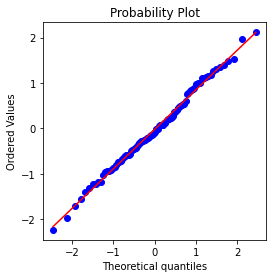

In [9]:
# 정규분포에서 임의로 생성한 100개의 값에 대한 QQ그림

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100) # 데이터 생성을 위한 메서드
stats.probplot(norm_sample, plot=ax)

plt.show()

## __2.7 긴 꼬리 분포__

#### 데이터는 일반적으로 정규분포를 따르지 않음.
#### 분포가 소득 데이터와 같이 비스듬하게 기울어져 있거나(비대창), 이산 데이터일 수도 있음

#### __꼬리(tail)__ : 적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분
#### __왜도(skewness)__ : 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도. 분포의 꼬리는 양 극한값에 해당.

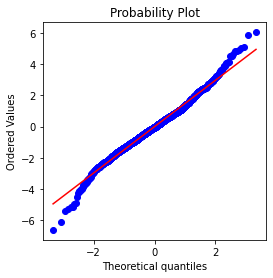

In [11]:
# 넷플릭스의 일일 주식 수익률에 대한 QQ-plot

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0])) # 0보다 큰 nflx데이터를 log적용, diff메서드를 사용하여 이전값과 비교

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

#### 기존 대각선보다 좀 더 기울여져 있음 > 정규분포를 따르지 않음

## __2.8 스튜던트의 t 분포__

#### __t 분포__ : __표본통계량의 분포__ 를 설명하는 데 사용. 정규분포와 생김새가 비슷하지만 꼬리부분이 약간 더 두껍고 길다.
#### 표본이 클 수록 정규분포를 닮은 t분포가 형성됨.

#### __n__ : 표본크기
#### __자유도(degrees of freedom)__: 다른 표본크기, 통계량, 그룹의 수에 따라 t분포를 조절하는 변수

#### 표본평균이 $\bar{x}$인 크기가 n인 표본이 있다고 가정할 때, s가 표본표분편차라면 표본평균 주위의 90% 신뢰구간은 다음과 같다
### $\bar{x} \pm t_{n-1}(0.05)\cdot\frac{s}{\sqrt{n}}$
#### $t_{n-1}(0.05)$는 $(n-1)$ 자유도를 갖는 t분포의 양쪽 끝에서 5%를 '잘라내는' t 통계량

## __2.9 이항분포__

#### __시행(trial)__ : 독립된 결과를 가져오는 하나의 사건(ex: 동전 던지기)
#### __성공(success)__ : 시행에 대한 관심의 결과 (=1)
#### __이항식(binomial)__ : 두 가지 결과를 갖는 식 (ex: 예/아니오)
#### __이항시행__ : 두 가지 결과를 가져오는 시행(= __베르누이 시행__)

#### __이항분포(binomial distribution)__ : n번 시행에서 (두 가지 결과에서) 성공한 횟수에 대한 분포 (= __베르누이 분포__)
#### 각 시행마다 그 성공 확률(p)가 정해져 있을 때, 주어진 시행 횟수(n) 중에서 성공한 횟수(x)의 도수분포

In [6]:
# 한 번의 클릭이 판매로 이어질 확률이 0.02일 때, 200회 클릭으로 0회 매출을 관찰할 확률은 얼마인가?

stats.binom.pmf(0, 200, 0.02)

0.0175879466057215

In [8]:
# scipy.stats 모듈 : 다양한 통계 분포 구현
# pmf, cdf 둘다 이항분포

stats.binom.pmf(2, n=5, p=0.1)
stats.binom.cdf(2, n=5, p=0.1)

0.99144

#### __이항분포의 평균 : $n \times p$__ -> 성공확률이 p인 경우, n번의 시행에서 예상되는 성공 횟수
#### __이항분포의 분산 : $n \times p (1-p)$__

#### n이 크고 p과 0과 1에 매우 근사하지 않다면, 이항분포는 정규분포로 근사한다.

## __2.10 카이제곱분포__

#### 기댓값 : 데이터에서 특이하거나 주목할 만한 겄이 없다. -> __귀무가설__
#### ex: 한 변수가 다른 변수와 독립적인지 검정하고 데이터 테이블의 각 셀에 있는 숫자가 의미가 있는지 검정

#### __카이제곱통계량__ : 검정 결과가 독립성에 대한 귀무 기댓값에서 벗어난 정도 / 관측 데이터가 특정 분포에 적합한 정도 (__적합도 검정__)
#### -> __관측값과 기댓값 차이__ 를 __기댓값의 제곱근으로 나눈 값을 다시 제곱하고__ 모든 범주에 대해 __합산한 값__
### $\chi^2 = \sum^k_{i=1} \frac{(O_i - E_i)^2}{E_i}$
#### k = 범주의 수
#### $O_i$ = i번째 범주에 속한 관측값
#### $E_i$ = i번째 범주에 속한 기댓값 ($E_i = N \times p_i$, N = 관측값의 총합, $p_i$ = i번째 범주에 대한 검정 비율)


#### __카이제곱분포__ : 귀무 가설에서 반복적으로 재표본추출한 통계량 분포 

## __2.11 F 분포__ 

#### __F 통계량__ : 연속된 관측값의 차이를 검정할 때, __그룹 평균 간 차이가__ 정규 무작위 변동에서 예상할 수 있는 것보다 얼마나 큰 지 측정,
#### __각 그룹 내 변동성(잔차 변동성)__ 에 대한 __그룹 평균 간 변동성의 비율__ -> 이 비교 분석을 __분산분석(ANOVA)__ 라고 함

#### F 통계량의 __분포__ : 모든 그룹의 평균이 동일한 경우(귀무 가설) 무작위 순열 데이터에 생성되는 모든 값의 빈도 분포
#### 서로 다른 자유도에 따른 다양한 F 분포 존재
#### 측정된 데이터(연속적)와 관련한 실험 및 선형 모델에 사용

## __2.12 푸아송 분포와 그 외 관련 분포들__ 

### __2.12.1 푸아송 분포__

#### __푸아송 분포(Poisson distribution)__ : 표집된 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분포
#### 이전 집계 데이터를 통해, 시간 단위 혹은 공간 단위에서 __평균적인 사건의 수__ 를 추정할 수 있다.
#### 푸아송 분포는 시간 및 공간 단위로 표집할 때, 그 사건들의 분포를 알려준다.

#### __람다(lambda, $\lambda$)__ : 어떤 일정 시간/공간의 구간 안에서 발생한 __평균 사건 수__
#### __푸아송 분포의 분산 = $\lambda$__

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


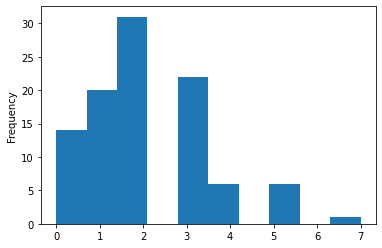

In [6]:
# 람다=2인 푸아송 분포에서 난수 100개를 생성

poi = stats.poisson.rvs(2, size=100)

pd.Series(poi).plot.hist()
plt.show()

### __2.12.2 지수분포__

#### __지수분포(exponential distribution)__ : 한 사건에서 그 다음 사건까지의 시간이나 거리에 대한 도수분포

#### $\lambda$를 사용하여 사건과 사건 간의 시간 분포를 모델링

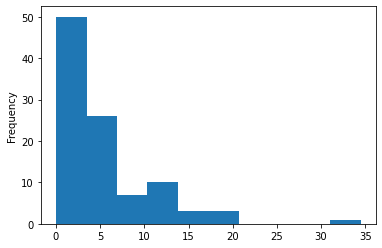

In [8]:
# 지수분포에서 난수를 생성
# n : 난수 발생 개수
# 비율(p) : 시간 주기당 사건 수
# 평균 사건 수가 0.2인 지수분포에서 난수 100개 생성

expo = stats.expon.rvs(scale=1/0.2, size=100)

pd.Series(expo).plot.hist()
plt.show()

#### $\lambda$가 해당 기간 동안 __일정하게 유지__ 된다. -> 푸아송/지수분포에서 가장 핵심적 전제

### __2.12.4 베이불 분포__

#### __베이불 분포(Weibull distribution)__ : 사건 발생률이 시간에 따라 변화하는, 지수분포의 확장된 버전

#### 일반적인 경우 사건 발생률은 시간에 따라 일정하지 않음. 
#### 사건 발생률이 시간에 따라 __지속적으로 변화할 경우__ 베이불 분포를 적용

#### __형상(shape) 파라미터 $\beta$__ 로 지정된 대로 발생률이 달라질 수 있음
#### $\beta > 1$일 경우 발생률은 시간이 지남에 따라 증가, $\beta < 1$일 경우 감소


#### __$\eta$__ : 베이불 분포의 두 번째 변수인 __'특성 수명'__, __척도(scale) 변수__

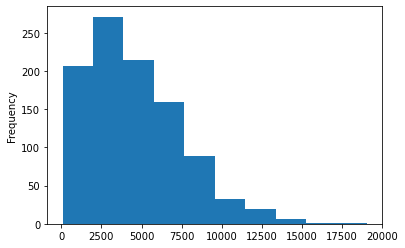

In [9]:
# 1.5 형상 파라미터, 5000의 특성 수명을 갖는 베이블 분포에서 난수 100개 생성

wei = stats.weibull_min.rvs(1.5, scale=5000, size=1000)

pd.Series(wei).plot.hist()
plt.show()